<a href="https://colab.research.google.com/github/Drinkler/Real-Estate-Analysis/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Programmentwurf

Matrikelnummern: 4819233, 6653948

## Allgemein


In [2]:
# Alle Importierungen
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import time

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

from scipy.stats import linregress
from scipy import stats

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# Einstellungen
%matplotlib inline
sns.set_style("darkgrid")

**Laden der CSV-Datei**

Damit die CSV-Datei von überall abrufbar ist, wurde ein Github Gist erstellt. In diesem Gist kann eine Datei gespeichert und abgefragt werden. Zu finden ist die Gist Datei [hier](https://gist.github.com/Drinkler/cb706c70f8642cd9ef47d482f97f805e).

Für die technische Anforderungen können Sie hier Ihre eigene CSV-Datei laden.

In [3]:
housing = pd.read_csv('res/DatenAusgegeben.csv', sep=';', encoding='utf8')
#housing = pd.read_csv('https://gist.githubusercontent.com/Drinkler/cb706c70f8642cd9ef47d482f97f805e/raw/Data_Science_DatenAusgegeben1.0.csv', sep=';', encoding='utf8')
housing

NameError: name 'pd' is not defined

## 1. Business Understanding

**Was sind Ziele auf Geschäftsebene?**

Anhand der Merkmale einer Immobilie welches Verkauft oder Gekauft werden soll, wird ein Preis anhand von vergleichbaren Immobilien ermittelt und hierzu ein Preisvorschlag den Investoren vorgelegt.
Der Preisvorschlag dient zur Orientierung unter welchem Preis Investoren nicht verkaufen bzw. über welchen Preis Sie nicht kaufen sollten.
Dies soll den Investoren ein profitables Investment ermöglichen.

Durch die Änderungen einzelner Merkmale (Erneuerung der Heizung, Anbau von Garage, …) einer Immobilie können unterschiedliche Preisvorschläge ermittelt werden, um so eine lukrativ Renovierung vorauszusagen.

<br>

**Welche Anforderungen an das Ergebnis gibt es?**

Anforderungen an das Ergebnis sind klar strukturierte und verständliche Diagramme und Daten, um das Ergebnis für Investoren einfach zu gestalten.

Durch Machine Learning Modelle sollen Preisvorschläge für verschiedene Immobilien zum Verkaufe oder Kauf ermittelt werden, diese können den Investoren bei profitablen Investments helfen. Außerdem sollen durch Veränderung von Merkmalen einer Immobilie, verschiedene Preisvorschläge zur Vorhersage lukrativer Renovierungen ermittelt werden.

<br>

**Welche offenen Fragen sollen beantwortet werden?**


*   Welcher Zeitpunkt ist der profitabelste zum investieren?
*   In welche Merkmale ist es sinnvoll zu investieren?

<br>

**Wie können beispielhafte Antworten aussehen?**


*   Ein 1 Fam Haus im Bezirk X in einem Gebiet mit hoher Bebauungsdichte und einer Anbau Garage ist nicht unter dem Preis Y Gotham City Dollar (GCD) zu verkaufen.
*   Es ist lohnenswert bei der gegebenen Immobilie Merkmal Y zu renovieren, um eine Preissteigerung der Immobilie hervorzurufen.





## 2. Data Exploration und Analyse

In [4]:
housing.shape

(2000, 28)

Der Datensatz hat 28 Merkmale und 2000 Dimensionen.

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Grundstueck in qm    2000 non-null   int64  
 1   Grundstuecksform     2000 non-null   object 
 2   Steigung             2000 non-null   object 
 3   Bezirk               2000 non-null   object 
 4   Zone                 2000 non-null   object 
 5   Lage                 2000 non-null   object 
 6   Typ                  2000 non-null   object 
 7   Zustand              2000 non-null   int64  
 8   Gebaut               2000 non-null   int64  
 9   Renoviert            2000 non-null   int64  
 10  Zustand Fassade      2000 non-null   int64  
 11  Kellerflaeche in qm  2000 non-null   int64  
 12  Heizung              2000 non-null   object 
 13  Heizungsqualitaet    2000 non-null   object 
 14  Klimaanlage          2000 non-null   object 
 15  Erster Stock in qm   2000 non-null   i

In [6]:
housing.describe()

,Grundstueck in qm,Zustand,Gebaut,Renoviert,Zustand Fassade,Kellerflaeche in qm,Erster Stock in qm,Zweiter Stock in qm,Wohnflaeche in qm,Schlafzimmer,Kuechen,Kuechenqualitaet,Raeume,Garagenkapazitaet,Pool,Verkaufsmonat,Verkaufsjahr,Preis
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,9.000000,2000.000000,2000.000000,2000.000000
mean,950.054000,5.697500,2099.031000,2113.344500,3.102500,96.140500,106.48100,31.125000,137.990000,2.883000,1.042000,3.456500,6.405000,1.735500,2.444444,6.102500,2137.856500,176791.811500
std,737.437654,1.129439,29.120114,20.168198,0.386094,38.249893,34.40918,39.461551,45.565953,0.817095,0.203117,0.632699,1.523856,0.736757,1.130388,2.628773,1.304131,72060.407925
min,121.000000,1.000000,2005.000000,2080.000000,1.000000,0.000000,31.00000,0.000000,31.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,2136.000000,39300.000000
25%,701.750000,5.000000,2083.000000,2095.000000,3.000000,74.000000,82.00000,0.000000,102.000000,2.000000,1.000000,3.000000,5.000000,1.000000,2.000000,4.000000,2137.000000,130000.000000
50%,887.000000,5.000000,2101.000000,2121.000000,3.000000,91.000000,99.00000,0.000000,133.000000,3.000000,1.000000,3.000000,6.000000,2.000000,2.000000,6.000000,2138.000000,158225.000000
75%,1078.000000,6.000000,2126.000000,2132.000000,3.000000,117.000000,126.00000,65.000000,161.000000,3.000000,1.000000,4.000000,7.000000,2.000000,3.000000,7.000000,2139.000000,207000.000000
max,19997.000000,9.000000,2140.000000,2140.000000,5.000000,298.000000,355.00000,174.000000,401.000000,6.000000,3.000000,5.000000,13.000000,4.000000,4.000000,12.000000,2140.000000,755000.000000




---



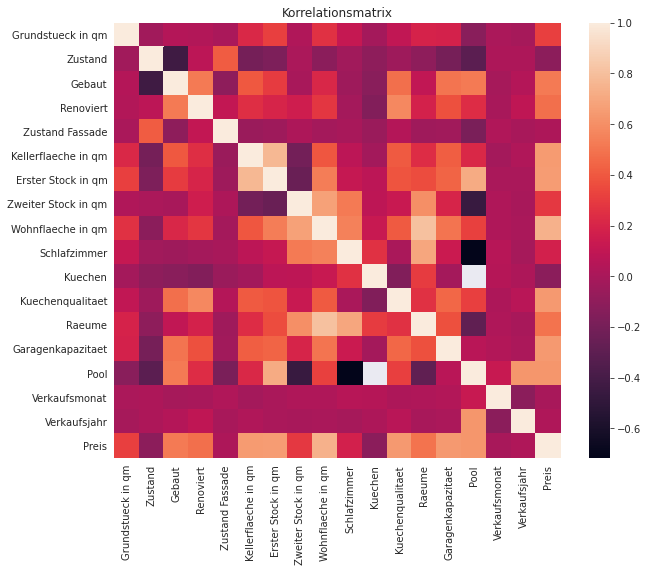

In [7]:
corr_matrix = housing.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)
plt.title('Korrelationsmatrix')
plt.show()

In [8]:
corr_matrix['Preis'].sort_values(ascending=False)

Preis                  1.000000
Wohnflaeche in qm      0.740241
Erster Stock in qm     0.652158
Kellerflaeche in qm    0.651032
Kuechenqualitaet       0.642411
Garagenkapazitaet      0.640781
Pool                   0.629721
Gebaut                 0.519263
Raeume                 0.495667
Renoviert              0.479822
Grundstueck in qm      0.314255
Zweiter Stock in qm    0.288142
Schlafzimmer           0.175599
Verkaufsjahr           0.023610
Zustand Fassade        0.015150
Verkaufsmonat         -0.002150
Zustand               -0.107618
Kuechen               -0.114129
Name: Preis, dtype: float64

Über die Korrelationsmatrix können bereits erste vermutliche Abhängigkeiten/Zusammenhänge festgestellt werden. Desto näher der Wert an 1 oder -1 ist, desto besser korrelieren die Merkmale. Eine Korrelation bedeutet jedoch keine Kausalität!

Anhand der Korrelationsmatrix kann man vermuten, dass der Verkaufsmonat sowie das Verkaufsjahr keine wichtige Rolle in der Preisvorhersage spielen.

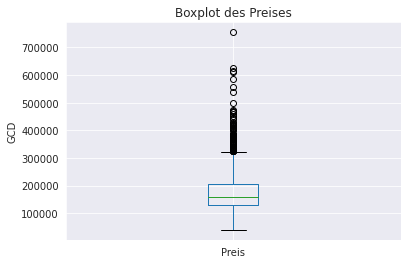

In [9]:
housing['Preis'].plot.box()
plt.ylabel('GCD')
plt.title('Boxplot des Preises')
plt.show()

In [10]:
housing['Preis pro qm'] = housing['Preis'] / housing['Grundstueck in qm']

Wir haben das Merkmal 'Preis pro qm' hinzugefügt um eine weitere Messgröße zu haben. Dies soll die Vergleichbarkeit aller Immobilien ermöglichen.

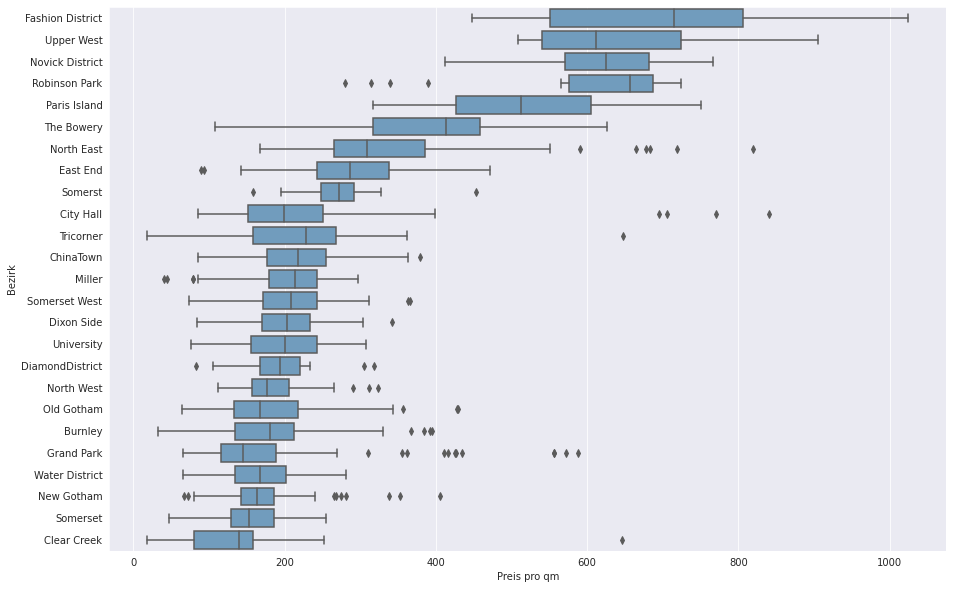

In [11]:
plt.figure(figsize=(15, 10))
sns.boxplot(x=housing['Preis pro qm'], y=housing['Bezirk'], order=housing.groupby(['Bezirk']).mean()['Preis pro qm'].sort_values(ascending=False).keys(), color='#649ECA')
plt.show()

In diesem Boxplot werden alle Bezirke zur Verteilung des Preis pro qm verglichen und nach absteigenden Quadratmeterpreis angezeigt.



---



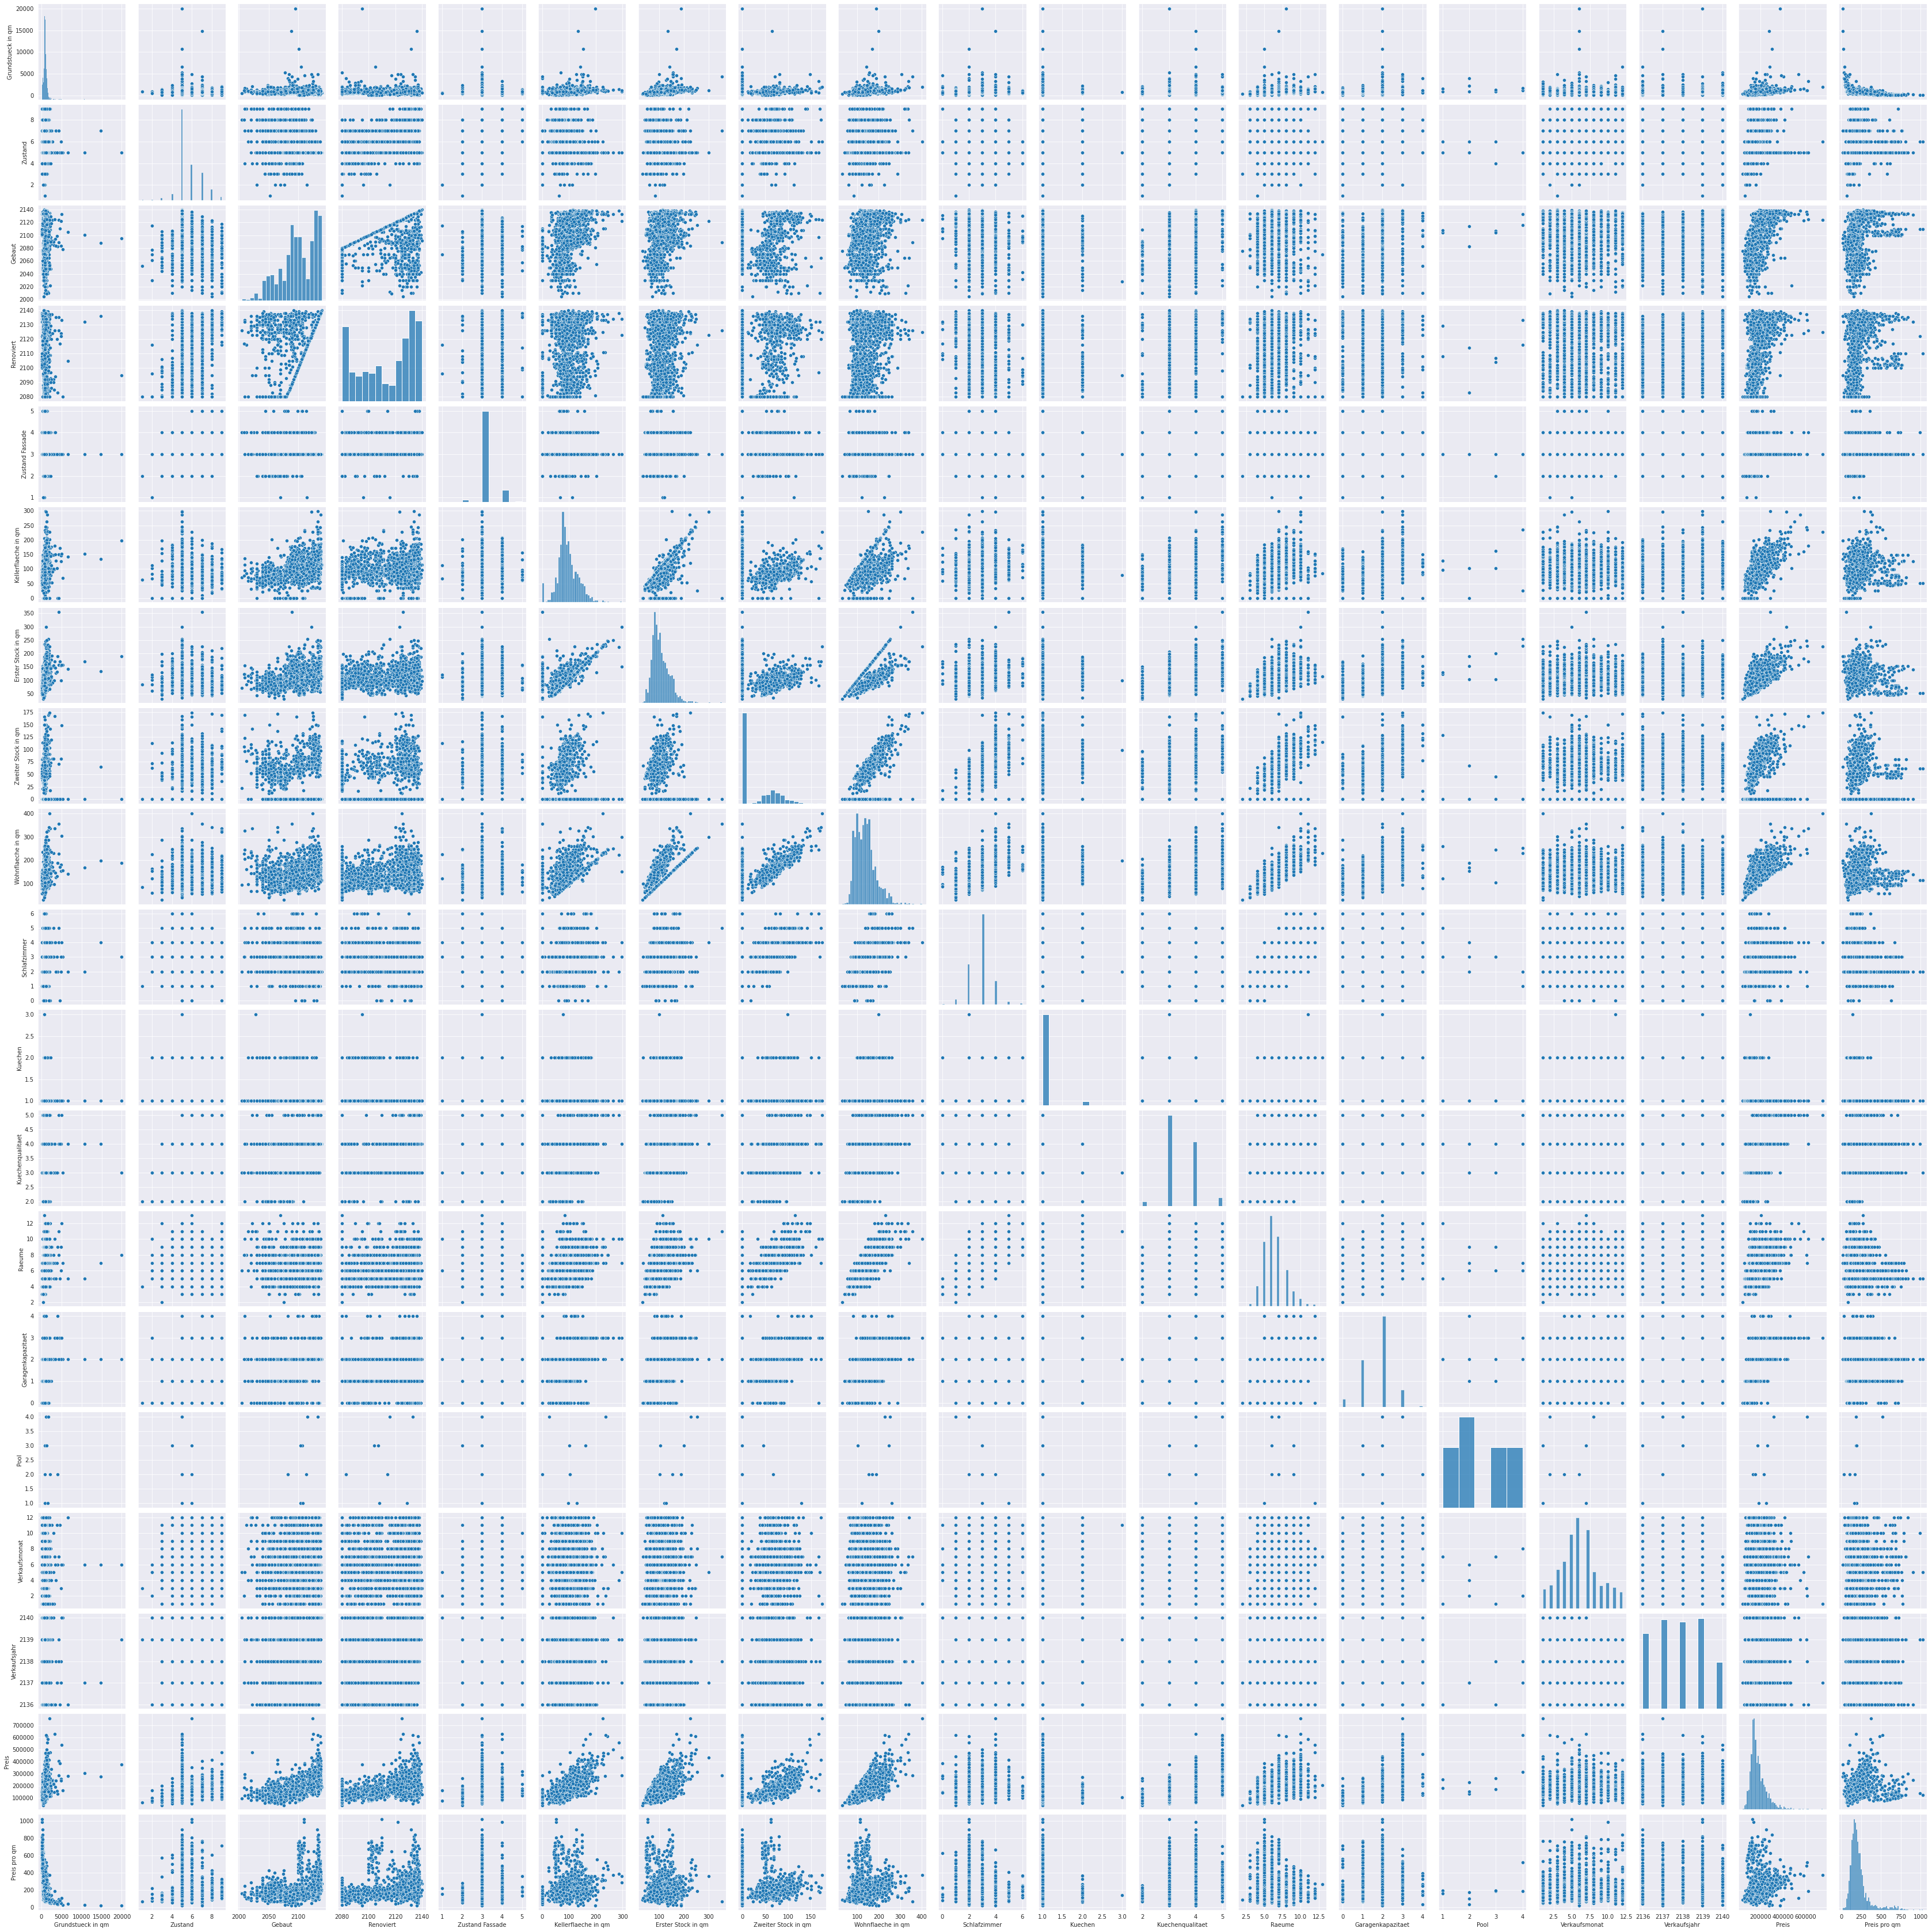

In [12]:
sns.pairplot(housing)
plt.show()

Aufgrund der langen Ausführungszeit wurde der Pairplot auskommentiert.

Alle Spalten werden mithilfe eines Graphen verglichen. Hierbei bietet dies einen groben Überblick über die vorhandenen Verteilungen und Daten.

Folgende Punkte, wie z.B. die Graphen Gebaut und Renoviert sowie bei den Graphen der Grundstücksfläche in qm sieht man mögliche Anomalien.

Ebenso fallen bei Graphen mit Zweiter Stock in qm und Kellerfläche in qm unterschiedliche Gruppierungen der Werte an.

Genannte Punkte werden nachfolgend genauer untersucht.

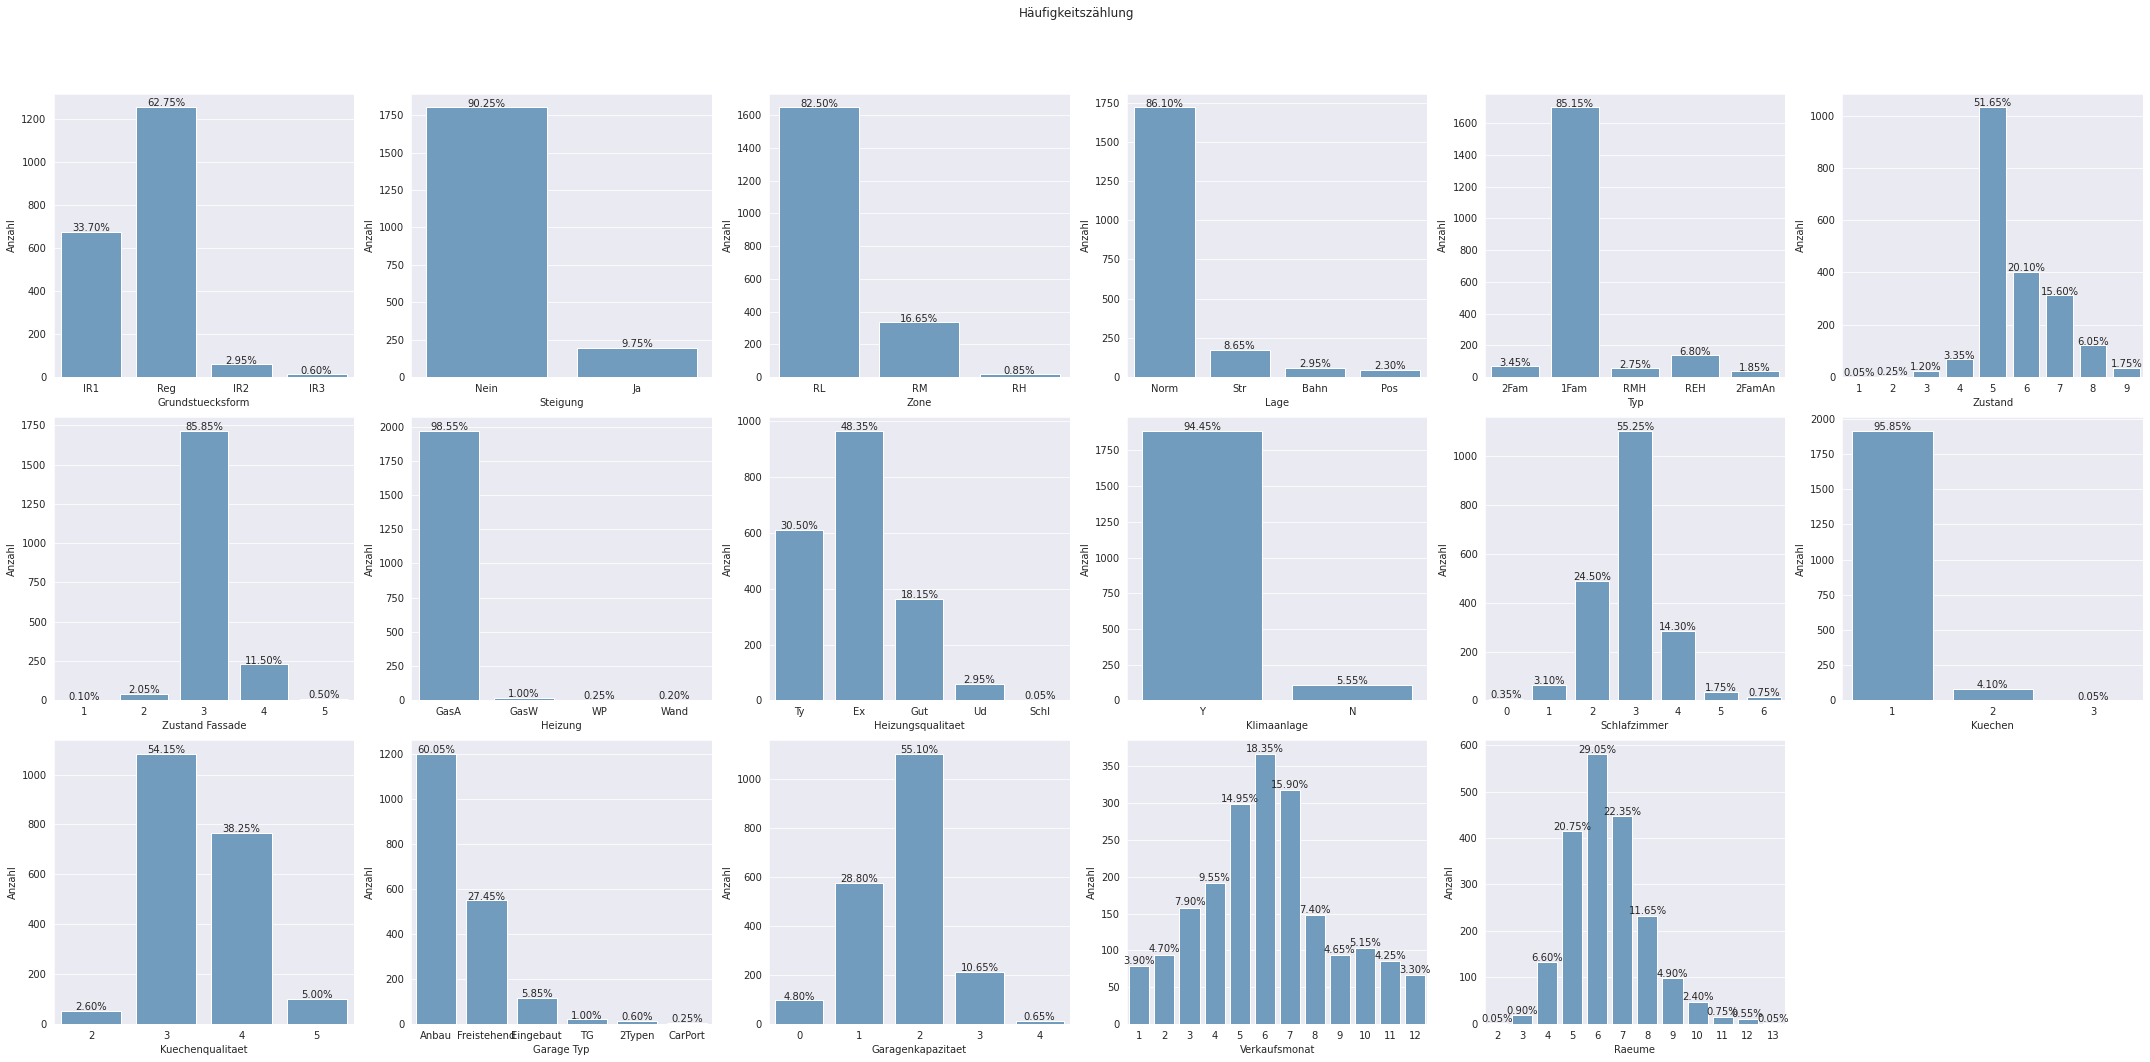

In [12]:
features = ['Grundstuecksform', 'Steigung', 'Zone', 'Lage', 'Typ', 'Zustand', 'Zustand Fassade', 'Heizung', 'Heizungsqualitaet', 'Klimaanlage', 'Schlafzimmer', 'Kuechen', 'Kuechenqualitaet', 'Garage Typ', 'Garagenkapazitaet', 'Verkaufsmonat', 'Raeume']

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(30,15))
axs[-1,-1].axis('off')
axs = np.ravel(axs)

for ax, feature in zip(axs, features):
  sns.countplot(x=feature, data=housing, ax=ax, color='#649ECA')

  total = float(len(housing))

  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format((height/total)*100),
            ha="center") 

  ax.set_ylabel('Anzahl')

plt.suptitle('Häufigkeitszählung')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In diesen Graphen werden die Häufigkeitsverteilungen von Merkmalen angezeigt,  welche in Klassen unterteilt sind. Lediglich wurden die Bezirke ausgelassen, da wie oben in den Boxplots aufgezeigt, diese dadurch besser gegenübergestellt werden können.

Durch Klassen werden Merkmale gruppiert. Dazu gehören auch boolesche Werte, siehe Steigung oder Klimaanlage.

Am Beispiel Verkaufsmonat sieht man ein klare Tendenz, die für spätere Vorhersagen rangezogen werden kann.

Daher wird die Verteilung der Preise angezeigt, um diese besser vergleichen zu können.

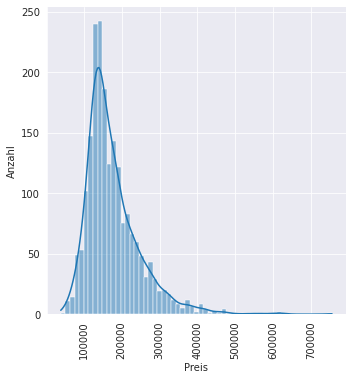

In [13]:
sns.displot(housing, x='Preis', kde=True)
plt.ylabel('Anzahl')
plt.xticks(rotation=90)
plt.show()

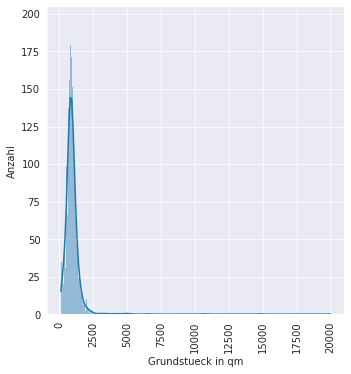

In [14]:
sns.displot(housing, x='Grundstueck in qm', kde=True)
plt.ylabel('Anzahl')
plt.xticks(rotation=90)
plt.show()

Ebenso wurde die Verteilung der Grundstücksfläche in qm angezeigt. Wie man schon aus dem Graphen sehen kann, sind die Grundstücksgrößen meist gleich verteilt, jedoch ab ungefähr 7500 qm sind nur noch einzelne Immobilien vorhanden.

Diese werden in den folgenden Plots genauer angeschaut.

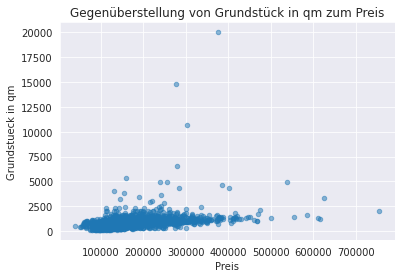

In [15]:
# Mögliche Anomalien werden gesucht
housing.plot(kind='scatter', x='Preis', y='Grundstueck in qm', alpha=0.5)
plt.title('Gegenüberstellung von Grundstück in qm zum Preis')
plt.show()

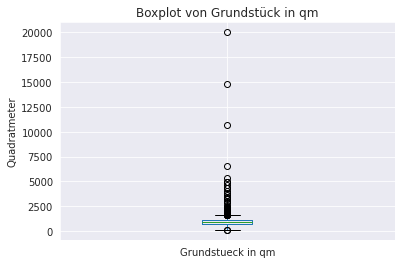

In [16]:
# Die Kreise zeigen Ausreißer/mögliche Anomalien an
housing['Grundstueck in qm'].plot.box()
plt.ylabel('Quadratmeter')
plt.title('Boxplot von Grundstück in qm')
plt.show()

In [17]:
# Anzeigen der Ausreißer
housing[housing['Grundstueck in qm'] > 7500]

,Grundstueck in qm,Grundstuecksform,Steigung,Bezirk,Zone,Lage,Typ,Zustand,Gebaut,Renoviert,Zustand Fassade,Kellerflaeche in qm,Heizung,Heizungsqualitaet,Klimaanlage,Erster Stock in qm,Zweiter Stock in qm,Wohnflaeche in qm,Schlafzimmer,Kuechen,Kuechenqualitaet,Raeume,Garage Typ,Garagenkapazitaet,Pool,Verkaufsmonat,Verkaufsjahr,Preis,Preis pro qm
115,10698,IR2,Ja,Clear Creek,RL,Norm,1Fam,5,2101,2132,3,153,GasA,Ty,Y,169,0,169,2,1,4,5,Anbau,2,NaN,6,2137,302000,28.229576
1164,19997,IR3,Ja,Tricorner,RL,Norm,1Fam,5,2095,2095,3,198,GasW,Ty,Y,189,0,189,3,1,3,8,Anbau,2,NaN,6,2139,375000,18.752813
1191,14772,IR2,Ja,Clear Creek,RL,Norm,1Fam,7,2088,2136,3,134,GasA,Gut,Y,134,65,199,4,1,4,7,Anbau,2,NaN,6,2137,277000,18.751692


In [18]:
# Preis pro qm der drei Ausreißer
housing[housing['Grundstueck in qm'] > 7500]['Preis pro qm']

115     28.229576
1164    18.752813
1191    18.751692
Name: Preis pro qm, dtype: float64

In [19]:
# Preis pro qm der zugehörigen Bezirke und Zonen
print('Median des Preises pro qm in Tricorner: {:.2f} qm'.format(housing[housing['Bezirk'] == 'Tricorner'].median()['Preis pro qm']))
print('Median des Preises pro qm in Clear Creek: {:.2f} qm'.format(housing[housing['Bezirk'] == 'Clear Creek'].median()['Preis pro qm']))
print('Anzahl der Immobilien mit niedriger Bebauungsdichte: {}'.format(len(housing[housing['Zone'] == 'RL'].index)))
print('Anzahl aller Immobilien: {}'.format(len(housing.index)))

Median des Preises pro qm in Tricorner: 227.82 qm
Median des Preises pro qm in Clear Creek: 140.08 qm
Anzahl der Immobilien mit niedriger Bebauungsdichte: 1650
Anzahl aller Immobilien: 2000


In dem Scatter-Plot werden die Grundstückspreise in Relation zum Grundstück in Quadratmetern gegenübergesellt. Dabei lässt sich eine Tendenz vorhersagen. Die Tendenz ist der großflächig blau gefärbte Bereich, also von 0 bis 7500 qm Grundstücksfläche. Allerdings gibt es drei Ausreißer, bei denen zu prüfen ist, ob jeweils eine Anomalie vorliegt. Alle drei Grundstücke haben eine Grundstücksgröße von über 7.500 qm, wobei der Preis nicht dem Trend aller anderen Grundstücke folgt. Der Preis pro qm ist weit ab vom Median (wie oben aufgezeigt).

Es besteht die Möglichkeit, dass es sich bei den Preisen um einen bezirksüblichen Wert handelt. Den Daten ist zu entnehmen, dass der Grundstückspreis pro qm im Bezirk "Tricorner" bei 227,82 GCD und der Wert der möglichen Anomalie bei 18,75 GCD liegt. Im Bezirk "Clear Creek" ist der Grundstückspreis pro qm bei 140,08 GCD und bei den beiden Extremwerten bei 18,75 bzw. 28,22 GCD. Daraus lässt sich schließen, dass der Grundstückspreis pro qm bei den oben genannten Datensätzen, die offensichtlich von der Norm abweichen, zu niedrig angesetzt sind.

Eine andere Möglichkeit ist, dass das Grundstück in einer niedrigen Bebauungsdichte liegt. Allerdings liegen 1650 von 2000 Immobilien in dieser niedrigen Bebauungsdichte, und die andere Häußer folgen nicht dem Trend von Grundstücksgröße zu Preis, wie dem Scatter-Plot zu entnehmen ist. 

Deshalb werden diese 3 Immobilien aus dem Datensatz gelöscht.

In [20]:
# Entfernen der Ausreißer
housing.drop(housing[housing['Grundstueck in qm'] > 7500].index, inplace=True)



---



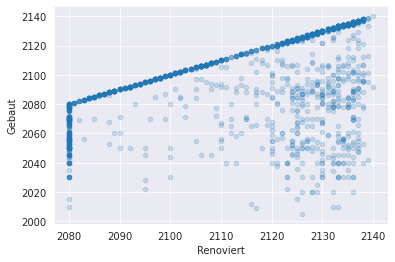

In [21]:
# Mögliche Anomalien werden gesucht
housing.plot(kind='scatter', x='Renoviert', y='Gebaut', alpha=0.2)
plt.show()

Im oberem Scatter-Plot wird das Baujahr mit dem Renovierungsjahr verglichen.

Daraus lassen sich zwei Aspekte entnehmen.

1.   Wenn eine Immobilie noch nie renoviert wurde, wird das Baujahr als Renovierungsjahr verwendet. Das ist die y=x Achse.
2.   Daten zur Renovierung reichen nur bis zum Jahre 2080 zurück. Normalerweise sollte die y=x Achse weiter zurück als 2080 reichen. Die Immobilien die vor 2080 gebaut wurden, wurden im Jahre 2080 als renoviert verzeichnet. Daher kann man keinen Rückschluss ziehen, wie viele Immobilien vor 2080 renoviert wurden. Dies kann zu einer Fehleinschätzung der Preisvorhersage führen.

Um Punkt 2 zu lösen, haben wir den Immobilien mit dem Renovierungsjahr 2080 das gleiche Renovierungsjahr wie Baujahr zugewiesen. Dadurch wurde der Graph ein wenig angepasst, jedoch kann man immernoch keinen Rückschluss auf die Renovierung vor 2080 ziehen.



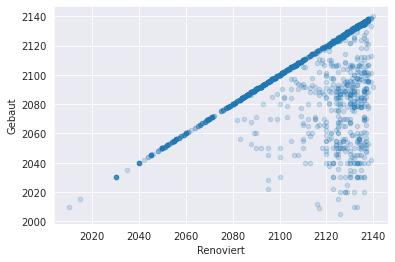

In [22]:
housing.loc[housing['Renoviert'] == 2080, 'Renoviert'] = housing['Gebaut']

housing.plot(kind='scatter', x='Renoviert', y='Gebaut', alpha=0.2)
plt.show()



---



In [23]:
housing.isna().sum()

Grundstueck in qm         0
Grundstuecksform          0
Steigung                  0
Bezirk                    0
Zone                      0
Lage                      0
Typ                       0
Zustand                   0
Gebaut                    0
Renoviert                 0
Zustand Fassade           0
Kellerflaeche in qm       0
Heizung                   0
Heizungsqualitaet         0
Klimaanlage               0
Erster Stock in qm        0
Zweiter Stock in qm       0
Wohnflaeche in qm         0
Schlafzimmer              0
Kuechen                   0
Kuechenqualitaet          0
Raeume                    0
Garage Typ               96
Garagenkapazitaet         0
Pool                   1988
Verkaufsmonat             0
Verkaufsjahr              0
Preis                     0
Preis pro qm              0
dtype: int64

Aufgrund der Datenbeschreibung gehen wir bei NaNs von fehlenden Daten aus.



---



### Summary

1.   Um das Ziel der Renovierung umzusetzen, wurden bestimmte Merkmale, die für die Renovierung in Frage kommen, in Betracht gezogen. Dazu zählen Merkmale wie: Zustand Fassade, Heizung, Klimaanalage, Zustand, Küchenqualität und Heizungsqualität und Garage. Allerdings sind viele dieser Merkmale ungleich verteilt. Daher ist es im weiterem Verlauf vielleicht nicht möglich eine Vorhersage zur lukrativen Renovierung zu ermitteln.
2.   Aufgrund der nicht notierten Renovierungen vor dem Jahr 2080 ist eine Fehlinterpretation der Daten möglich. Außerdem werden nicht renovierte Immobilien als renoviert markiert. Dabei wird das Renovierungsjahr dem Baujahr gleichgesetzt.
3.   Merkmale die zu wenig Angaben haben, wie z.B. Pool, können für die Preisvorhersage nicht als sicherer Indikator ausgewählt werden.
4.   Bei der Vorhersage des Verkauf-/Kaufpreises tritt eine höhere Fehlertoleranz auf als es schon ist. Da bei der Kategorie Preis bereits Anomalien auftreten.

## 3.1 Data Preparation

**Entfernen der NaNs**

Da 1988 von 2000 Werte beim Pool nicht verfügbar sind, wird die gesamte Spalte entfernt. Methoden zum Ausfüllen der fehlenden Daten, wie most_frequent und mean, würden hier keinen Sinn machen, da es zu wenige Werte gibt.

In [24]:
housing.drop('Pool', axis=1, inplace=True)



---



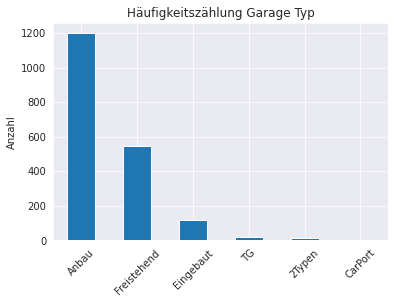

In [25]:
housing['Garage Typ'].value_counts().plot.bar()
plt.ylabel('Anzahl')
plt.title('Häufigkeitszählung Garage Typ')
plt.xticks(rotation=45)
plt.show()

In [26]:
housing['Garage Typ'].fillna(housing['Garage Typ'].value_counts().index[0], inplace=True)

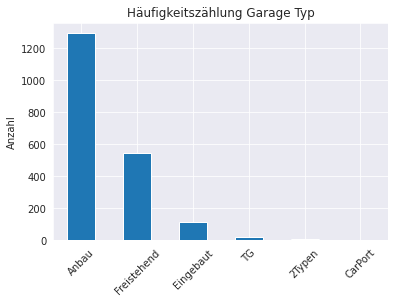

In [27]:
housing['Garage Typ'].value_counts().plot.bar()
plt.ylabel('Anzahl')
plt.title('Häufigkeitszählung Garage Typ')
plt.xticks(rotation=45)
plt.show()

Die Anzahl der nicht verfügbaren Werte in dem Merkmal 'Garage Typ' ist zur Anzahl der Gesamtdaten gering. Aufgrund dessen wird das most_frequent Verfahren angewendet. Alle nicht verfügbaren Werte werden dem Typ Anbau angerechnet. Den Plots ist zu entnehmen, dass die Verteilung der einzelnen Werte relativ gleich bleibt.

**Experimentieren mit neuen Merkmalen**

In [29]:
#housing['bedrooms_per_room'] = housing['Schlafzimmer'] / housing['Raeume']
#housing['kitchens_per_room'] = housing['Kuechen'] / housing['Raeume']
#housing['Wohnflaeche_zu_Grundstuecksflaeche'] = housing['Wohnflaeche in qm'] / housing['Grundstueck in qm']

In [30]:
#housing['Keller'] = housing['Kellerflaeche in qm'] != 0
#housing['Zweiter Stock'] = housing['Zweiter Stock in qm'] != 0
#housing['Ist Renoviert'] = housing['Renoviert'] != housing['Gebaut']

Bei diesen neuen Merkmalen wurde versucht eine bessere Korrelation mit dem Preis zu finden.

Die neu erstellten Merkmale führten zu einer Verschlechterung des Modelles und wurden daher nicht verwendet.

**LabelEncoder**

In [28]:
features = ['Steigung', 'Klimaanlage'] # Merkmale bei dem der LabelEncoder angewendet werden soll

le = LabelEncoder()

for feature in features:
  housing[feature] = le.fit_transform(housing[feature])

Der LabelEncoder wird auf die beiden Merkmale Steigung und Klimaanlage angewendet, da es sich hierbei um boolesche Variablen handelt und die maschinellen Lernverfahren mit Zahlen besser als mit Zeichenketten umgehen können.

**OneHotEncoding**

In [29]:
#from sklearn.preprocessing import OneHotEncoder

#features = ['Grundstücksform', 'Bezirk', 'Zone', 'Lage', 'Typ', 'Heizung', 'Garage Typ'] # Merkmale bei dem der OneHotEncoder angewendet werden soll

#enc = OneHotEncoder(categories='auto', drop=None, handle_unknown='error')

#for feature in features:
#  X = housing[feature].values.reshape(-1, 1)

#  X_out = enc.fit_transform(X).toarray()

#  X_out_df = pd.DataFrame(X_out, columns=enc.get_feature_names([feature]))

#  housing.drop(feature, axis=1, inplace=True)

#  housing = pd.concat([housing, X_out_df], axis=1)

  # Einzeiler
  #housing = pd.concat([housing.drop(feature, axis=1), pd.DataFrame(enc.fit_transform(housing[feature].values.reshape(-1, 1)).toarray(), columns=enc.get_feature_names([feature]))], axis=1)

  # Einzeiler mit pd.get_dummies()
  #housing = pd.concat([housing.drop(feature, axis=1), pd.get_dummies(housing[feature], prefix=feature)], axis=1)

Wegen der aufwendigen Erstellung des OneHotEncoders wird es als Kommentar weiter bestehen. Allerdings kann es mit der Funktion get_dummies() von pandas in einer Zeile ersetzt werden. :(

In [30]:
housing = pd.get_dummies(housing)

Auf die restlichen Spalten mit Zeichenketten wird die Funktion get_dummies() angewendet. Dadurch entstehen 46 zusätzliche Spalten. Wie bereits bei dem LabelEncoder erwähnt, kann das maschinelle Lernverfahren besser mit Zahlen agieren. Der LabelEncoder wurde bei den restlichen Daten nicht angewendet, da es zu möglichen Fehlinterpretationen der Daten kommen kann.

**Backward Elimination**

In [31]:
housing.shape

(1997, 76)

In [32]:
# Quelle: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
X = housing.drop('Preis', axis=1)
y = housing['Preis']

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

housing = housing[cols]
housing.insert(len(housing.columns), 'Preis', y)

In [33]:
housing.shape

(1997, 35)

Aufgrund der hohen Spaltenanzahl wurde ein Eliminierungsverfahren angewendet. Bei der Backward Elimination wird die Performanz der einzelnen Merkmale iterativ berechnet und das Merkmal mit der schlechtesten Performanz entfernt. Dies wird solange durchgeführt, bis alle übrigen Merkmale den pvalue von 0,05 nicht unterschreiten. 0,05 ist ein Standardwert bei der Backward Elimination. Bei der pvalue handelt es sich um ein Signifikanzwert, die oft besagt, dass ein bestimmter Zusammenhang nicht besteht.

Es ist nicht verwunderswert, dass die Spaltenanzahl von 76 auf 35 herunterfällt, da unwichtige Splaten durch Dummy-Werte erst vermehrt und im Anschluss wieder herausgelöscht wurden.

**Entfernen von Ausreißern**

In [34]:
housing.shape

(1997, 35)

In [35]:
# Quelle: https://www.kite.com/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python
y = housing['Preis']
X = housing.drop('Preis', axis=1)

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 6).all(axis=1)
X = X[filtered_entries]

X.insert(len(X.columns), 'Preis', y)
housing = X

In [36]:
housing.shape

(1779, 35)

Mithilfe diese Verfahren wurde eine gewisse Anzahl von Ausreißern entfernt. Da mit einer Standardabweichung von drei nur noch 909 Dimensionen vorhanden sind, haben wir die Standardabweichung auf sechs gesetzt um das Modell nicht mit zu wenig Daten überanzupassen.

**Skalierung der Daten**

In [37]:
housing.head(3)

,Grundstueck in qm,Steigung,Zustand,Gebaut,Kellerflaeche in qm,Erster Stock in qm,Zweiter Stock in qm,Wohnflaeche in qm,Schlafzimmer,Kuechen,Kuechenqualitaet,Garagenkapazitaet,Preis pro qm,Bezirk_City Hall,Bezirk_Clear Creek,Bezirk_DiamondDistrict,Bezirk_East End,Bezirk_Fashion District,Bezirk_North East,Bezirk_North West,Bezirk_Old Gotham,Bezirk_Somerst,Bezirk_The Bowery,Bezirk_Tricorner,Bezirk_Upper West,Lage_Bahn,Lage_Norm,Lage_Str,Typ_1Fam,Typ_2FamAn,Typ_REH,Typ_RMH,Garage Typ_2Typen,Garage Typ_Freistehend,Preis
0,898,1,4,2107,183,183,0,183,6,2,3,2,174.276169,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,156500
1,1326,1,5,2133,122,113,109,222,3,1,4,3,263.951735,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,350000
2,725,1,7,2096,80,83,0,83,3,1,4,1,190.206897,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,137900


In [38]:
y = housing['Preis']
X = housing.drop('Preis', axis=1)

ss = StandardScaler()
housing_without_price = pd.DataFrame(ss.fit_transform(X), index=y.index)
housing_without_price.columns = X.columns
housing_without_price.insert(len(housing_without_price.columns), 'Preis', y)

housing = housing_without_price

In [39]:
housing.head(3)

,Grundstueck in qm,Steigung,Zustand,Gebaut,Kellerflaeche in qm,Erster Stock in qm,Zweiter Stock in qm,Wohnflaeche in qm,Schlafzimmer,Kuechen,Kuechenqualitaet,Garagenkapazitaet,Preis pro qm,Bezirk_City Hall,Bezirk_Clear Creek,Bezirk_DiamondDistrict,Bezirk_East End,Bezirk_Fashion District,Bezirk_North East,Bezirk_North West,Bezirk_Old Gotham,Bezirk_Somerst,Bezirk_The Bowery,Bezirk_Tricorner,Bezirk_Upper West,Lage_Bahn,Lage_Norm,Lage_Str,Typ_1Fam,Typ_2FamAn,Typ_REH,Typ_RMH,Garage Typ_2Typen,Garage Typ_Freistehend,Preis
0,-0.007366,0.288851,-1.512433,0.319095,2.434367,2.439174,-0.803599,1.032504,3.949401,5.262466,-0.682997,0.425078,-0.357671,-0.209795,0.0,0.0,-0.191607,0.0,-0.228123,-0.238833,-0.306751,0.0,0.0,0.0,0.0,-0.175234,0.405299,-0.31003,-2.755758,0.0,-0.230838,-0.171796,0.0,-0.648788,156500
1,1.210222,0.288851,-0.635439,1.223693,0.775695,0.285512,1.949960,1.887779,0.120527,-0.190025,0.937072,1.807553,0.458301,-0.209795,0.0,0.0,-0.191607,0.0,4.383595,-0.238833,-0.306751,0.0,0.0,0.0,0.0,-0.175234,0.405299,-0.31003,0.362877,0.0,-0.230838,-0.171796,0.0,-0.648788,350000
2,-0.499521,0.288851,1.118550,-0.063619,-0.366342,-0.637486,-0.803599,-1.160510,0.120527,-0.190025,0.937072,-0.957397,-0.212715,-0.209795,0.0,0.0,-0.191607,0.0,-0.228123,-0.238833,-0.306751,0.0,0.0,0.0,0.0,-0.175234,0.405299,-0.31003,0.362877,0.0,-0.230838,-0.171796,0.0,1.541334,137900


Aufgrund der großen Abweichungen der Werte wurde ein Skalierungsverfahren eingeführt. Der StandardScaler wird verwendet, wenn die Merkmale starke Schwankungen zeigen. Dabei werden die Werte so angepasst, dass diese für maschinelle Lernverfahren einfacher zu handhaben sind. Der Durchschnitt eines Merkmales wird hierbei 0 und die Standardabweichung 1.

## 3.2 Modeling

In [40]:
# Test- und Trainingsdaten erstellen
y = housing['Preis']
X = housing.drop('Preis', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Hilfsfunktion für MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [46]:
# Hilfsfunktion zum Plotten der Graphen
def plot_regression_results(ax, y_test, y_pred, title, estimated_time, scores):

  # linear least-squares
  slope, intercept, rvalue, pvalue, stderr = linregress(y_test, y_pred)
  ax.plot([y_test.min(), y_test.max()], [intercept+y_test.min()*slope, intercept+y_test.max()*slope], '--r')

  ax.scatter(y_test, y_pred, alpha=0.7)

  # Anzeigen der Werte in einer Box
  extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
  ax.legend([extra], [scores], loc='upper left')

  ax.set_xlabel('Tatsächliche Werte in GCD')
  ax.set_ylabel('Vorhergesagte Werte in GCD')
  ax.set_title('{}\nTrainiert in {:.2f} Millisekunden'.format(name, estimated_time*1000))

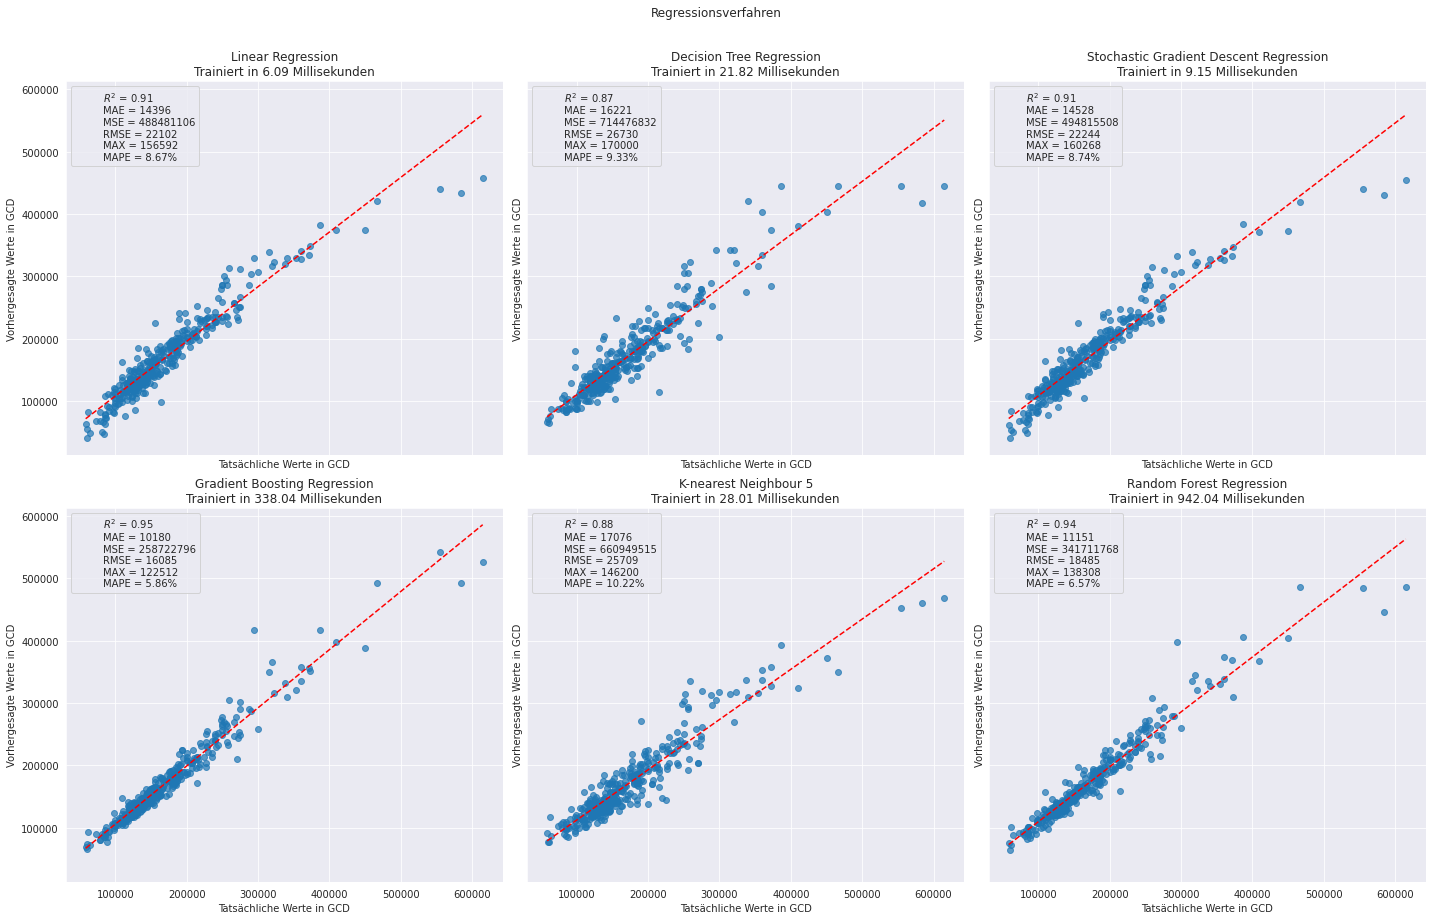

In [47]:
lin = LinearRegression()
dtr = DecisionTreeRegressor()
sgd = SGDRegressor(loss='squared_loss')
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rfr = RandomForestRegressor()

# Verwendete Regressionen
estimators = [('Linear Regression', lin),
              ('Decision Tree Regression', dtr),
              ('Stochastic Gradient Descent Regression', sgd),
              ('Gradient Boosting Regression', gbr),
              ('K-nearest Neighbour 5', knn),
              ('Random Forest Regression', rfr)]

# Festlegen des Subplots
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 13))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
  start_time = time.time()
  # Trainieren des Modelles
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  estimated_time = time.time() - start_time

  # Anzeigen des Modelles
  plot_regression_results(ax, y_test, y_pred, name, estimated_time, 
                          (r'$R^2$ = {:.2f}' + '\n' + 
                          r'MAE = {:.0f}' + '\n' +
                          r'MSE = {:.0f}' + '\n' +
                          r'RMSE = {:.0f}' + '\n' +
                          r'MAX = {:.0f}' + '\n' +
                          r'MAPE = {:.2f}%')
                          .format(r2_score(y_test, y_pred),
                                  mean_absolute_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred, squared=False),
                                  max_error(y_test, y_pred),
                                  mean_absolute_percentage_error(y_test, y_pred)))
  
plt.suptitle('Regressionsverfahren')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Die Lineare Regression, oben links im überstehenden Graphen zu sehen, hat einen R² Wert von 0,91. Das Bestimmtheitsmaß ist die erklärte Variation geteilt der Gesamtvariation. D.h. je besser die Vorhersage am eigentlichen Preis ist, desto näher kommt das Bestimmtheitsmaß an eins heran. Der Wert 0,91 ein genauer Wert, da eine Vorhersage eigentlich nie eins erreicht.

Das Lineare Modell weicht im Durchschnitt 22.102 GCD vom tatsächlichen Preis ab. Dies kann man mithilfe des RMSE Wertes ablesen. Der RMSE ergibt sich aus der Quadratwurzel des durchschnittlichen Prognosefehlers. Der durchschnittliche Prognosefehler, also der MSE, berechnet sich aus der durchschnittlichen Abweichung aller Werte im Quadrat.

Der maximale Fehler einer Preisvorhersage liegt bei dem Linearem Modell bei 156.592 GCD. Dies ist am MAX Error ablesbar.

Der RMSE, MAE und MAX Wert ist relativ zu einer möglichen Immobilie für den ein Preis vorhergesagt werden soll.
Aussagekräftiger ist der MAPE-Wert. Der MAPE-Wert gibt an, wie weit der vorhergesagte Preis vom tatsächlichen Preis im Durchscnitt abweicht. Mit diesem Wert kann dem Risiko entgegengewirkt werden, da sich der Prozentanteil bei Berücksichtigung auf den Wert der Immobilie stützt und kein Absolutwert ist. Das Risiko ist die Schwankung des Wertes, welcher vorhergesagt wird. 

Für den Kauf einer Immobilie sollte der Preis um 8,76% runter gerechnet werden, damit der Käufer auf jeden Fall einen Gewinn erzielt. Dennoch kann über den vorhergesagten Preis ein Gewinn erzielt werden, da die Immobilie bis zu 8,76% teurer sein kann. Für den Verkauf sollte man 8,76% auf die Preisvorhersage draufrechnen um die Immobilie nicht zu günstig zu verkaufen. 
Durch dieses Vorgehen kann der Investor sein Risiko deutlich minimieren und ein profitables Investment ermöglichen.

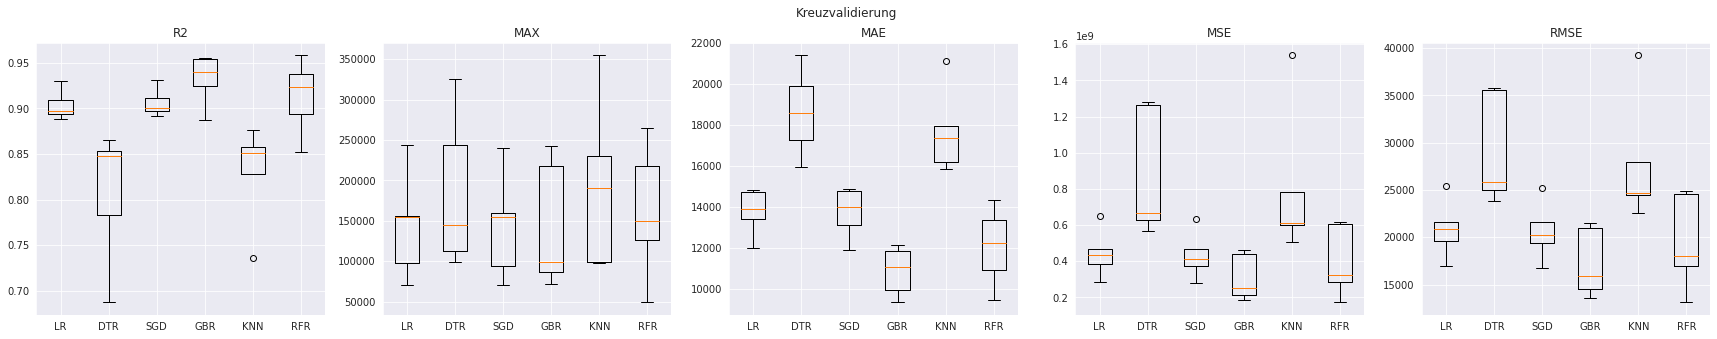

In [44]:
r2_values = []
max_error_values = []
neg_mean_absolute_error_values = []
neg_mean_squared_error_values = []
neg_root_mean_squared_error_values = []

for name, est in estimators:
  # Kreuzvalidierung
  score = cross_validate(est, X_train, y_train, cv=5,
                         scoring=['r2', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                         n_jobs=-1)

  # Abspeichern der Werte
  r2_values.append(score['test_r2'])
  max_error_values.append(-score['test_max_error'])
  neg_mean_absolute_error_values.append(-score['test_neg_mean_absolute_error'])
  neg_mean_squared_error_values.append(-score['test_neg_mean_squared_error'])
  neg_root_mean_squared_error_values.append(-score['test_neg_root_mean_squared_error'])

# Plotten der Werte
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

names = ['LR', 'DTR', 'SGD', 'GBR', 'KNN', 'RFR']

axs[0].boxplot(r2_values, labels=names)
axs[0].set_title('R2')
axs[1].boxplot(max_error_values, labels=names)
axs[1].set_title('MAX')
axs[2].boxplot(neg_mean_absolute_error_values, labels=names)
axs[2].set_title('MAE')
axs[3].boxplot(neg_mean_squared_error_values, labels=names)
axs[3].set_title('MSE')
axs[4].boxplot(neg_root_mean_squared_error_values, labels=names)
axs[4].set_title('RMSE')

plt.suptitle('Kreuzvalidierung')
plt.show()

**Begründung der Wahl**

Es wird sich für die Gradient Boosting Regression entschieden, da dieser bei den fünf Werten, welche für die Genauigkeit der Vorhersage dienen, im Vergleich zu den anderen Modellen am besten abschneidet.

Mithilfe des Gradient Boosting Modelles können den Investoren die genausten Preisvorschläge geboten werden. Obwohl der Preis des Stochastic Gradient Descent oder des Linearen Modells weniger streut, ist die Vorhersage des GBR genauer. 

Der Median beim MAX-Wert von dem BGR-Modells ist am niedrigsten, was ein geringeres Risiko bei der Preisvorhersage für Investoren bedeutet.  Allerdings schlagen 25% der Werte, die über dem Median liegen, höher als andere Modelle nach oben aus. Daher könnten in manchen Fällen Modelle wie der SGD geringere Preisschwankungen errechnen.

Beim MAE sind sowohl der Median als auch die Schwankungen für das BGR-Modell am geringsten. Da der MAE die durchschnittliche Größe der Fehler vorhersagt, ist ein möglichst geringer Wert von Vorteil für der Preisvorhersage.

Anhand des RMSE kann die durchschnittliche Preisschwankung der Preisvorhersage ermittelt werden. Bei Kauf/Verkauf einer Immobilie kann mithilfe dieses Wertes ein Preisrahmen festgelegt werden. Allerdings ist dies ein Absolutwert. Wird versucht, das Risiko durch eine Berechnung mit der Vorhersage und dem RMSE-Wert zu minimieren, kann dies dennoch den Preis zu hoch oder zu niedrig ansetzen, da wie erwähnt, es sich um einen absoluten Wert handelt. An diesem Rahmen kann sich der Investor  orientieren, dennoch ist die Preisanpassung durch den MAPE-Wert sinnvoller.

## 4. Evaluation

**Evaluation der Gradient Boosting Regression**

In [45]:
print(u'R²: {:.3f} \u00B1 {:.3f}'.format(np.mean(r2_values[3]), np.std(r2_values[3])))
print(u'MAX: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(max_error_values[3]), np.std(max_error_values[3])))
print(u'MAE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_absolute_error_values[3]), np.std(neg_mean_absolute_error_values[3])))
print(u'MSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_squared_error_values[3]), np.std(neg_mean_squared_error_values[3])))
print(u'RMSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_root_mean_squared_error_values[3]), np.std(neg_root_mean_squared_error_values[3])))

R²: 0.932 ± 0.025
MAX: 143,677 ± 71,608
MAE: 10,869 ± 1,081
MSE: 309,592,690 ± 118,081,235
RMSE: 17,278 ± 3,327


Mit Hilfe des R² wird die Genauigkeit der Vorhersage bestimmt. Desto näher der Wert an eins liegt, desto geanuer ist die Vorhersage.  Außerdem ist der Wert zuverlässig, da der Wert von 93,3% sehr hoch ist und lediglich um 2,5% schwankt. Alle Werte des Gradient Boosting Modelles liegen im Rahmen der Validierung. 

Weniger aussagekräftig ist der MAX-Wert. Dieser gibt an, wie stark eine Vorhersage vom eigentlichen Preis abweichen kann. Alledings ist der Wert absolut zur Vorhersage. Der Wert kann lediglich für den Vergleich zu anderen Modellen herangezogen werden.

Auf eine Preisvorhersage kann ebenfalls nicht der MAE als auch der MSE angewendet werden, um den Preis an eine möglichen Schwankung anzupassen.  Beide Werte geben eine absolute Zahl wieder, die wie beim MAX-Wert nur für den Vergleich zu anderen Modellen dient. Dieses gilt auch für den RMSE, da dieser Wert sich aus der Wurzel des MSE errechnet.

Im Gegensatz dazu ist der MAPE-Wert. Dieser Wert gibt eine prozentuale Abweichung der Vorhersage an und es kann daher einer Schwankung entgegengewirkt werden. Der MAPE-Wert ist relativ und kann so auf alle Preiskategorien von Immobilien angewendet werden. Dennoch bedeutet dies, dass bei teureren Immobilien eine höherer Wert gegengerechnet werden muss, um das Risiko zu minimieren. Ein Nachteil daran ist, dass ein zu hoher Wert gegengerechnet wird und eine Immobilie durch einen zu niedrigen Preis seltener erworben werden kann.  Der MAPE-Wert ist die Äquivalenz zum MAE-Wert in Prozent.

**Zusammenfassung**

Anhand des finalen Modelles können nun für Investoren eine sichere Preisvorhersage getroffen werden. Um das Risiko eines Kaufes/Verkaufes möglichst minimal zu halten bzw. ein profitables Investment zu ermöglichen, kann der MAPE Wert mit einberechnet werden.

Bereits durch die Backward Elimination und der Aussortierung von Ausreißern können Merkmale zur Wichtigkeit einer Renovierung berücksichtigt werden. Allerdings können damit gestellte Beispielsfragen aus Aufgabe 1, wie z.B. zu welchem Zeitpunkt es am profitabelsten ist zu investieren, nicht beantwortet werden. Diese Merkmale hat das Modell als unwichtig für die Preisvorhersage erkannt und entfernt. Jedoch kann man auch an übrig gebliebenen Merkmalen, wie dem Garagentyp und der Küchenqualität, eine sinnvolle Renovierung ablesen.

Mithilfe der Preisvorhersage und noch den vorhanden Merkmalen können die beispielhaften Antworten aus Aufgabe 1 formuliert werden. Um herauszufinden, ob die Renovierung eines Merkmales lohnenswert ist, kann man das beliebige Merkmale beliebig ändern und somit unterschiedliche Preisvorhersagen ermitteln Die unterschiedlichen Preise geben Auskunft darüber, ob sich die Renovierung lohnt.